In [64]:
#DATAD LOADING

In [65]:

import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
dt=pd.read_csv("retail_sales_dataset.csv")


In [67]:
dt.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

In [68]:
## DATA CLEANING


In [69]:
print("Dimension of the dataset:", dt.shape)

Dimension of the dataset: (1000, 9)


In [70]:
print("size of dataset:", dt.size)


size of dataset: 9000


In [71]:
print("Columns in the dataset: ", dt.keys())

Columns in the dataset:  Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [72]:
dt.keys()

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [73]:
print("Information of the dataset: \n",dt.info())
#cleaning the data by checking the duplicates
print("After removing duplicates: \n",dt.drop_duplicates(inplace=True))
print("Size of the dataset after removing duplicates: \n",dt.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
Information of the dataset: 
 None
After removing duplicates: 
 None
Size of the dataset after removing duplicates: 
 9000


In [74]:
#DESCRIPTIVE STATISTICS

In [75]:
dt.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [76]:
print(dt[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode())


   Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


In [77]:
print(dt[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].median())

Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64


In [78]:
print(dt[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mean())

Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64


In [79]:
print(dt[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].std())

Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [80]:
#TIME SERIES ANALYSIS

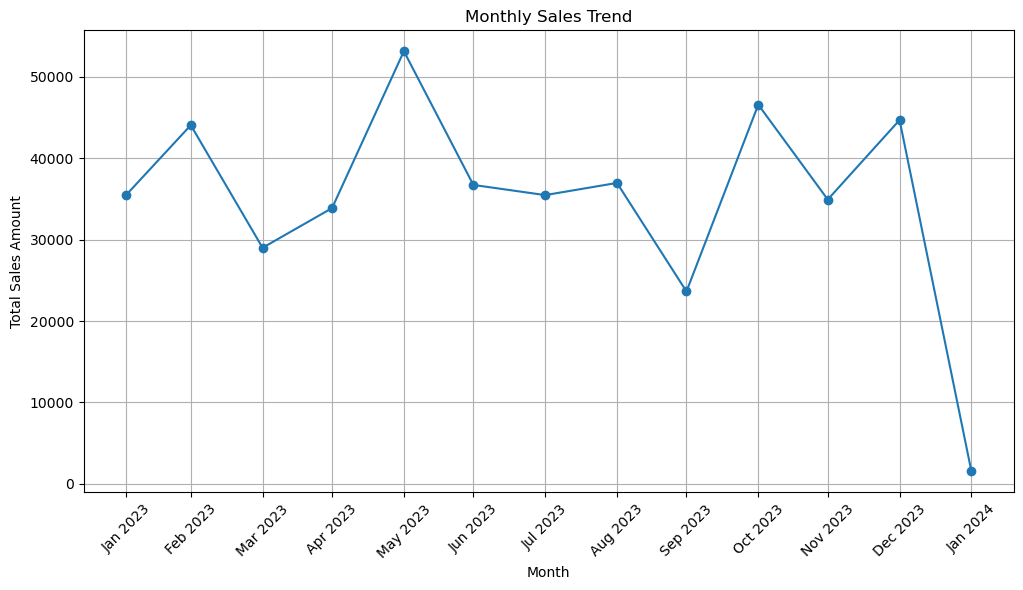

In [81]:
dt['Date']=pd.to_datetime(dt['Date'])
monthly_sales = dt.resample('M', on='Date')['Total Amount'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=45)
plt.grid(True)
plt.show()

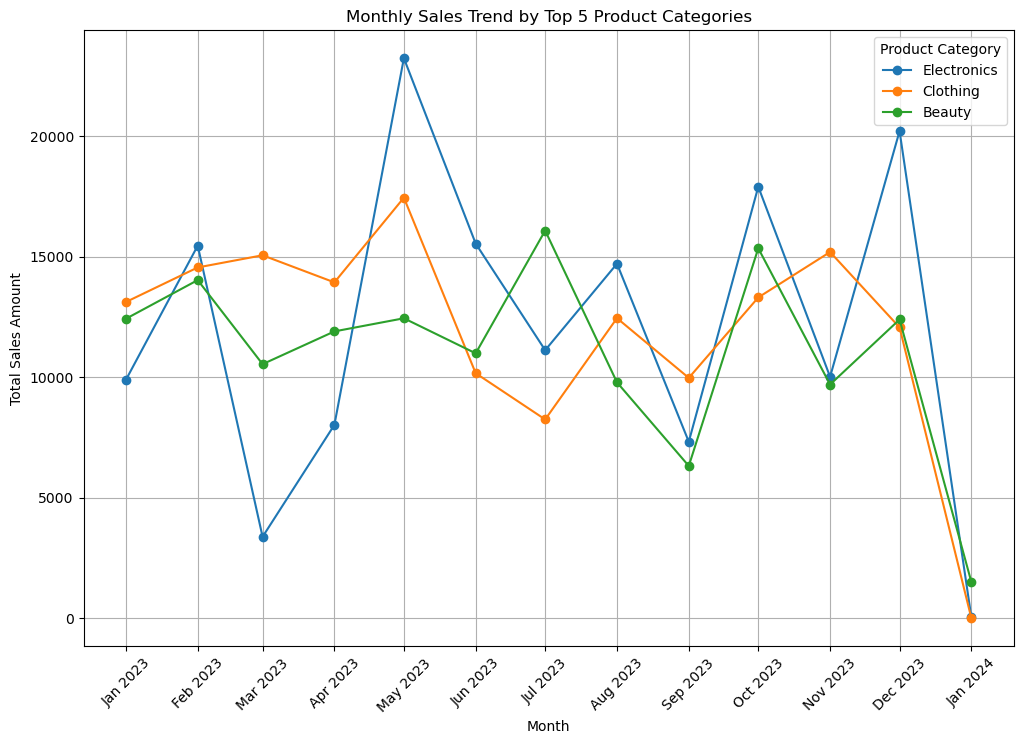

In [82]:
# Identify the top 5 categories by total sales
monthly_category_sales = dt.groupby([dt['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()
pivot_table = monthly_category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)
top_categories = pivot_table.sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 8))
# Plotting the Sales Trend for Each Top Category
for category in top_categories:
    plt.plot(pivot_table.index.to_timestamp(), pivot_table[category], marker='o', label=category)

plt.title('Monthly Sales Trend by Top 5 Product Categories')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=pivot_table.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in pivot_table.index.to_timestamp()], rotation=45)
plt.show()

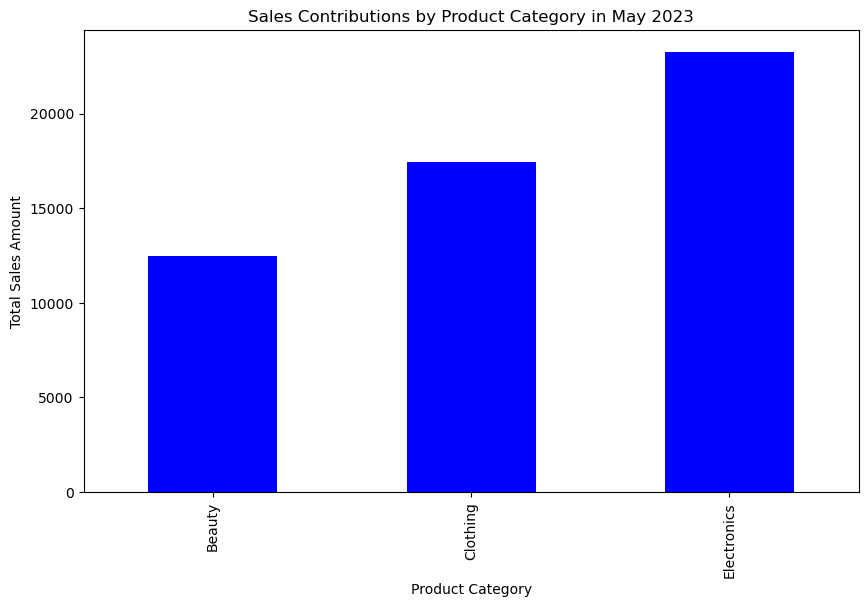

The total sales in the month of May is: 53150


In [83]:
#Filtering the Data for May 2023
start_date = '2023-05-01'
end_date = '2023-05-31'
data_may = dt[(dt['Date'] >= start_date) & (dt['Date'] <= end_date)]

#Grouping Data by Product Category and Calculating Total Sales
category_sales_highest_month = data_may.groupby('Product Category')['Total Amount'].sum()

#Plotting the Sales Contributions by Product Category
plt.figure(figsize=(10, 6))
category_sales_highest_month.plot(kind='bar', color='blue')
plt.title('Sales Contributions by Product Category in May 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_may = data_may['Total Amount'].sum()
print(f'The total sales in the month of May is: {total_sales_may}')

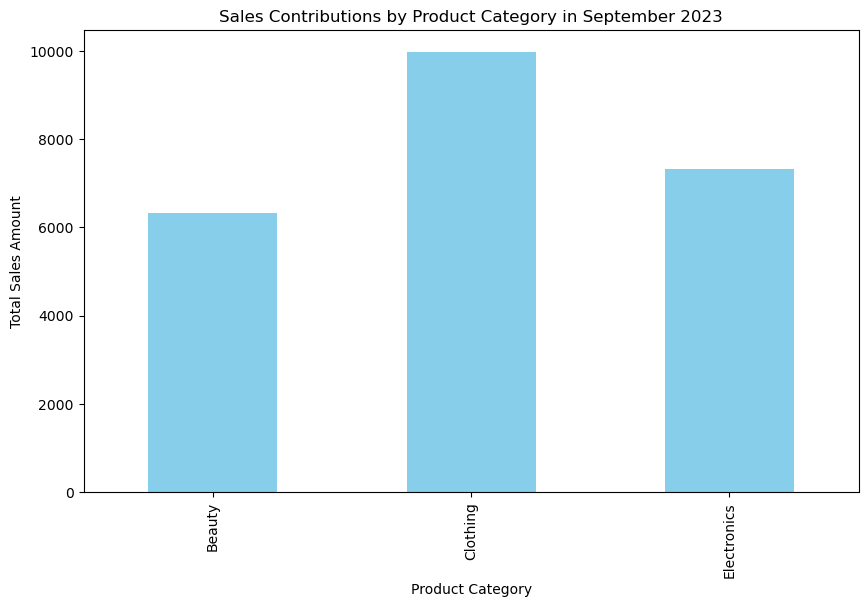

The total sales in the month of September is: 23620


In [84]:
#Electronics contributed the maximum sales amount in the max sales month.
start_date = '2023-09-01'
end_date = '2023-09-30'
data_september = dt[(dt['Date'] >= start_date) & (dt['Date'] <= end_date)]

category_sales_september = data_september.groupby('Product Category')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
category_sales_september.plot(kind='bar', color='skyblue')
plt.title('Sales Contributions by Product Category in September 2023')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

total_sales_september = data_september['Total Amount'].sum()
print(f"The total sales in the month of September is: {total_sales_september}")

In [85]:
# Group the data by date and count the number of transactions for each date
date_count = dt.groupby('Date').size()

# Identify the date with the highest number of transactions
max_count_date = date_count.idxmax()
max_count_transactions = date_count[max_count_date]

# Print the result
print(f"The date with the highest number of transactions is {max_count_date} with {max_count_transactions} transactions.")


The date with the highest number of transactions is 2023-05-16 00:00:00 with 11 transactions.


Text(0.5, 1.0, 'Number of Transactions by Day')

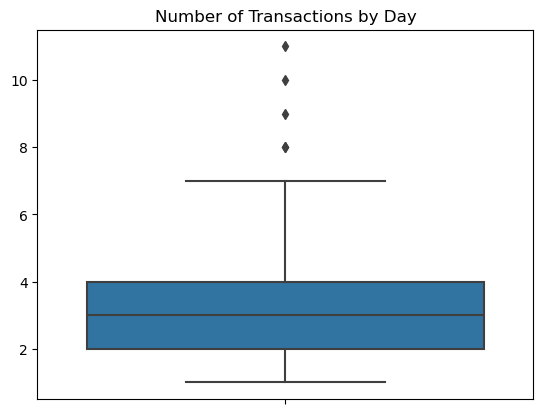

In [86]:
sns.boxplot(y=date_count.values).set_title('Number of Transactions by Day')

# CUSTOMER AND PRODUCT ANALYSIS AND VISUALIZATION

Text(0.5, 1.0, 'Age distribution by product category')

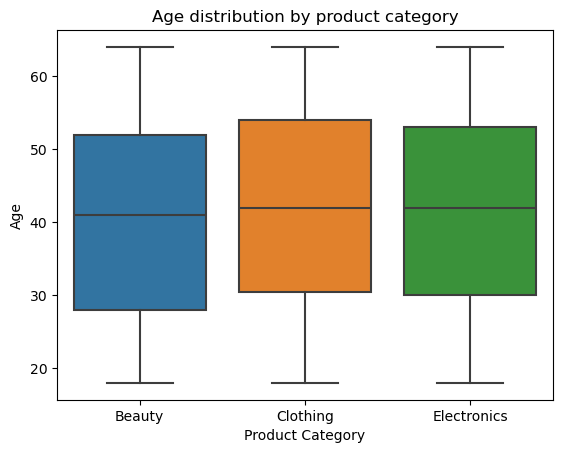

In [87]:
sns.boxplot(x=dt['Product Category'],y=dt['Age'],data=dt).set_title('Age distribution by product category')

Text(0.5, 1.0, 'Age distribution by Gender')

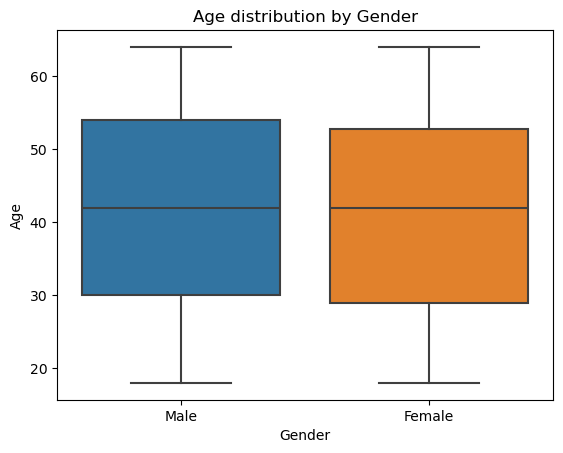

In [88]:
sns.boxplot(x=dt['Gender'],y=dt['Age'],data=dt).set_title('Age distribution by Gender')

In [89]:
print("Number of records based on gender in %: ",dt['Gender'].value_counts()/len(dt['Gender']))

Number of records based on gender in %:  Gender
Female    0.51
Male      0.49
Name: count, dtype: float64


In [90]:
print(dt['Total Amount'].max())
print(dt['Total Amount'].min())

2000
25


array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

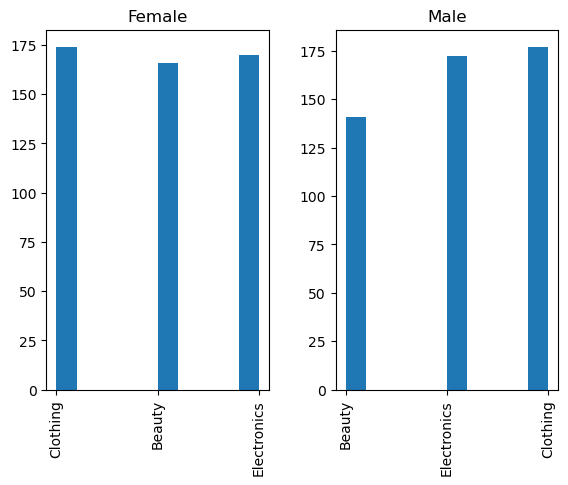

In [91]:
dt.hist(column='Product Category',by='Gender')

<Axes: xlabel='Gender'>

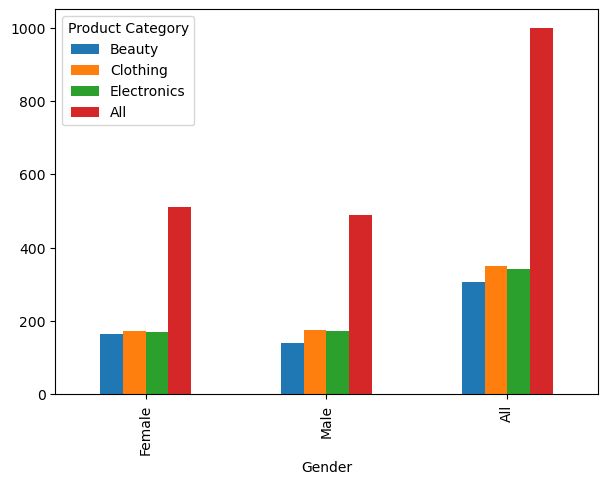

In [92]:
pd.crosstab(dt['Gender'],dt['Product Category'],margins=True).plot(kind='bar',figsize=(7,5))

Gender
Female    510
Male      490
Name: count, dtype: int64


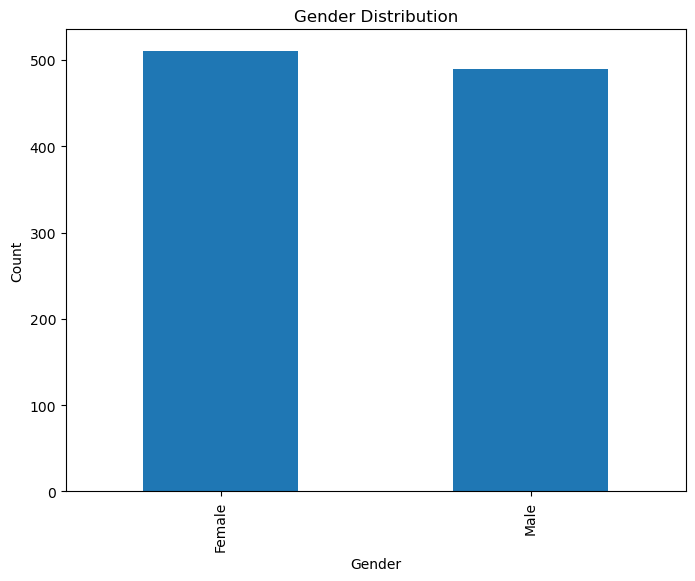

In [93]:
gender_distribution = dt['Gender'].value_counts()
print(gender_distribution)

gender_distribution.plot(kind='bar', figsize=(8, 6), title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

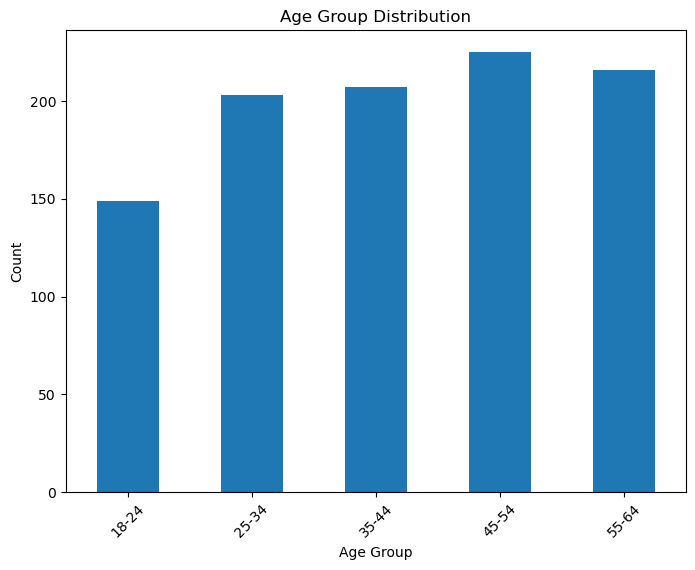

In [94]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
dt['Age Group'] = pd.cut(dt['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution =dt['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

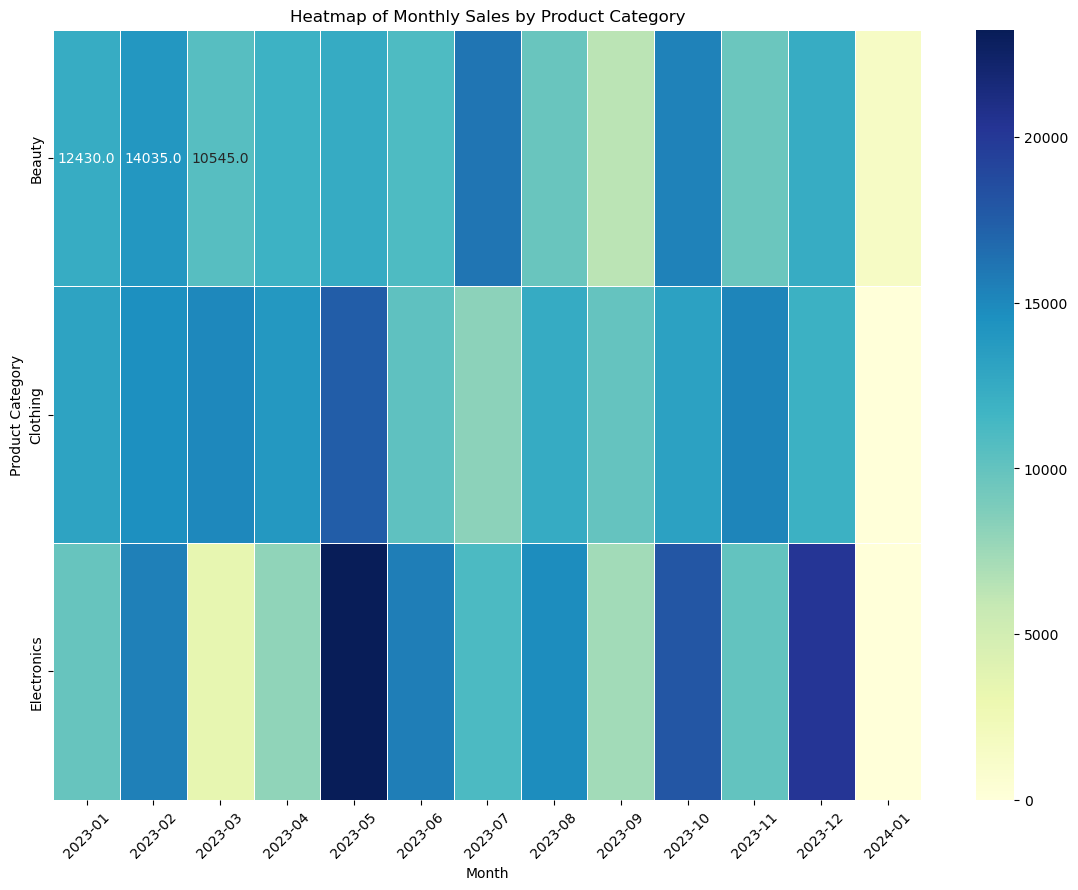

In [95]:
dt['Month'] = dt['Date'].dt.to_period('M')

pivot_table = dt.pivot_table(
    index='Product Category',
    columns='Month',
    values='Total Amount',
    aggfunc='sum',
    fill_value=0
)

# Heatmap of monthly sales
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Monthly Sales by Product Category')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.xticks(rotation=45)
plt.show()


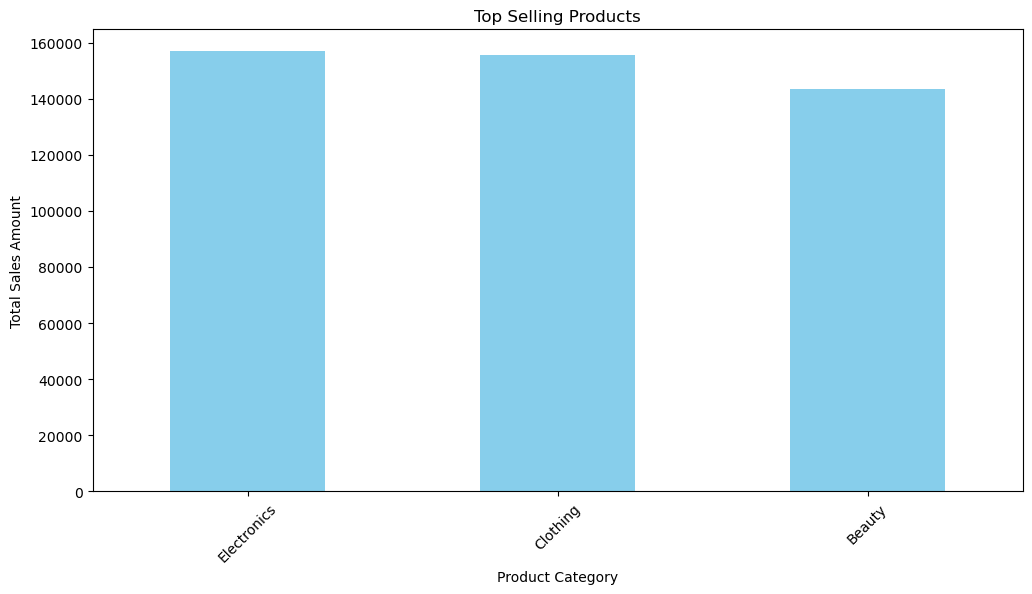

In [96]:
# Top Selling Products
top_selling_products = dt.groupby('Product Category')['Total Amount'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\lucif\AppData\Local\Temp\ipykernel_20384\2454051719.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_product_sales = dt.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()


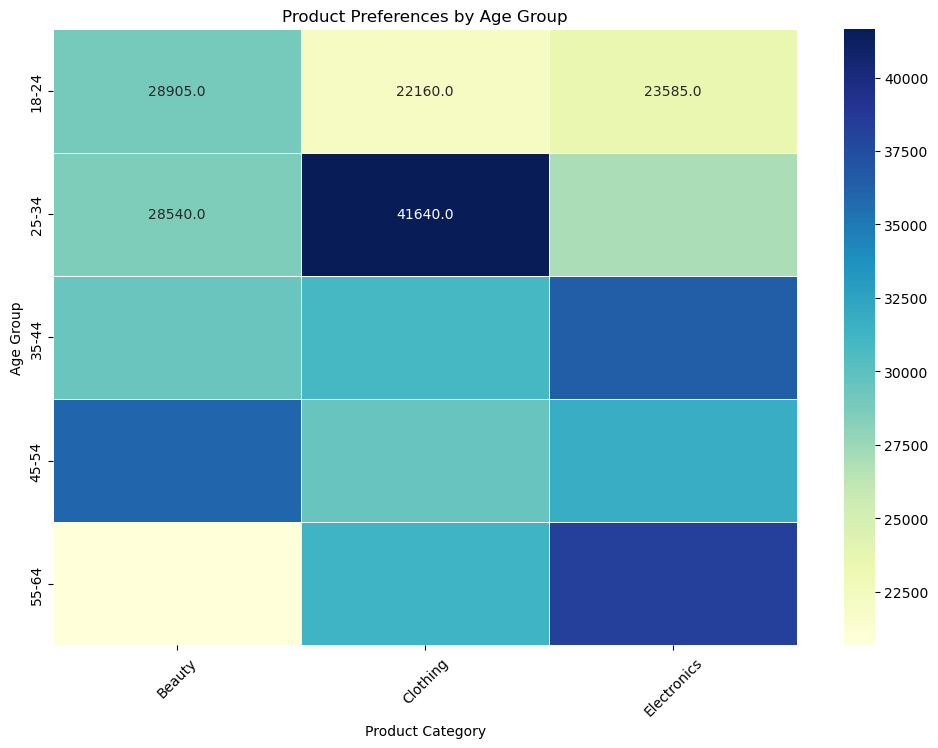

In [98]:
# Product Preferences by Age Group
age_group_product_sales = dt.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(age_group_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

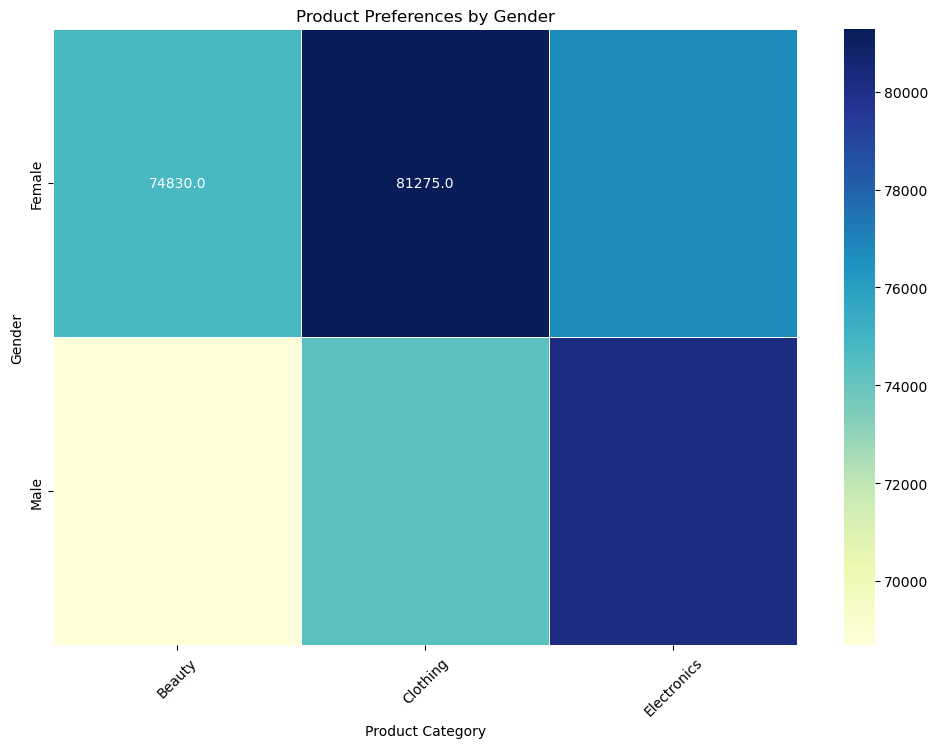

In [99]:
# Product Preferences by Gender
gender_product_sales = dt.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(gender_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.show()

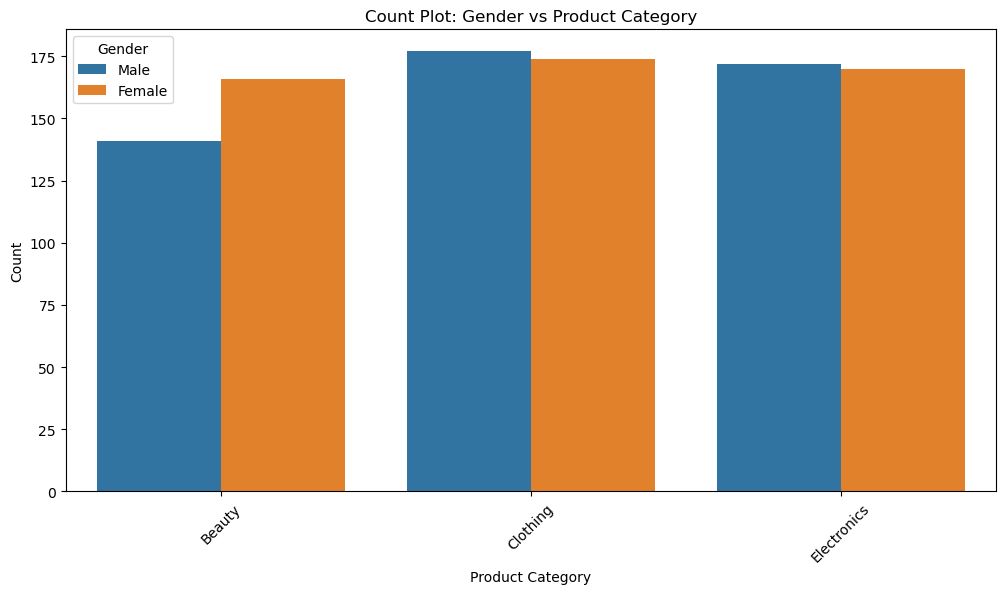

In [101]:
# Count Plot: Count of Gender and Product Category
plt.figure(figsize=(12, 6))
sns.countplot(data=dt, x='Product Category', hue='Gender')
plt.title('Count Plot: Gender vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

C:\Users\lucif\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\lucif\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


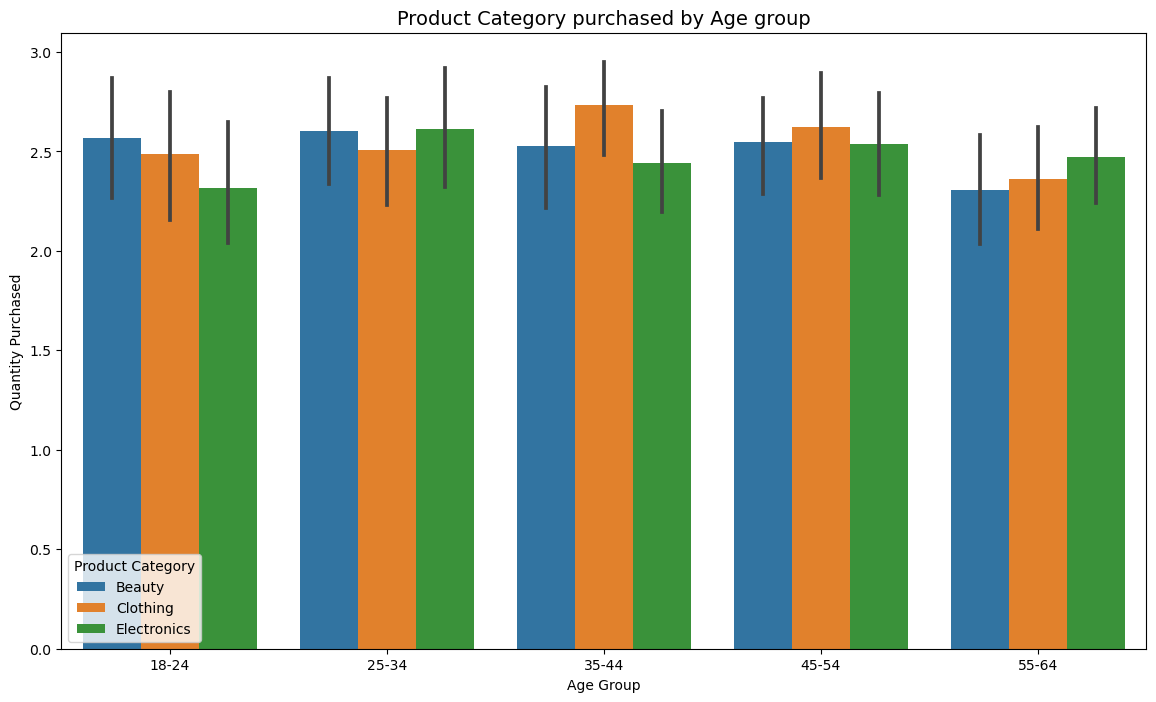

In [103]:
# bar plot
plt.figure(figsize=(14,8))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=dt)
plt.title('Product Category purchased by Age group', fontsize=14)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Quantity Purchased', fontsize=10)
plt.show()

In [107]:
cutoff_date = pd.to_datetime('2024-06-30')
retail_cutoff = dt[dt['Date'] < cutoff_date]
retail_cutoff_sorted =retail_cutoff.sort_values(by='Total Amount', ascending=False)
print(retail_cutoff_sorted[['Customer ID','Total Amount','Product Category']].head(5))


    Customer ID  Total Amount Product Category
571     CUST572          2000         Clothing
88      CUST089          2000      Electronics
502     CUST503          2000           Beauty
560     CUST561          2000         Clothing
831     CUST832          2000           Beauty
